Reading Data From File

In [14]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

dataset = pd.read_csv('/content/Seed_Data.csv')
display(dataset)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


Mathematical Operations on DataSet

In [15]:
dataset.describe(include = "all")  # The "describe()" returns the dataset by doing mathematical operations on it 

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


Elbow Method to find optimal Clutsers

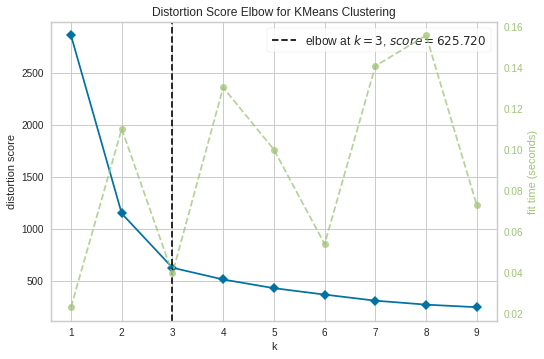

In [17]:
features = dataset.iloc[:, 0:69]  # The iloc function enables us to select a particular cell of the DataSet
target = dataset.iloc[:, -1]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)
visualizer.poof() 

K Means Clustering

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[14.63202703, 14.45324324,  0.8790973 ,  5.56178378,  3.27489189,
         2.74404324,  5.18493243,  0.13513514],
       [11.90906667, 13.25026667,  0.85154933,  5.22233333,  2.86509333,
         4.72218667,  5.09304   ,  1.86666667],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836,  0.98360656]])

Silhouette Average for k Means

In [19]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clustering = ', silhouette_avg)

silhouette coefficient for the above clustering =  0.49241642841932


Purity for K Means

In [20]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(target, cluster_labels)
print ('Purity for the above clustering = ', purity)

Purity for the above clustering =  0.9238095238095239


Pip Installation for Clustering

In [21]:
!pip install pyclustering

from pyclustering.cluster.kmedoids import kmedoids

     |████████████████████████████████| 2.6 MB 5.0 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=93d362be5594ce7e5f23cfb32e8d7aecf6d329478d6f728fa9fac72faf482798
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


K Mediods Clustering

In [22]:
# Randomly picking 3 indexes
initial_medoids = [3, 53, 170]

kmedoids_instance = kmedoids(features.values.tolist(), initial_medoids)

# Run cluster analysis.
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()

cluster_labels = np.zeros([210], dtype=int)
for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels[x] = 1
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels[x] = 2

print("The 0 in output shows that it belongs to k1")
print("The 1 in output shows that it belongs to k2")
print("The 2 in output shows that it belongs to k3")

cluster_labels

The 0 in output shows that it belongs to k1
The 1 in output shows that it belongs to k2
The 2 in output shows that it belongs to k3


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Mediods for above clustering

In [23]:
kmedoids_instance.get_medoids()

[118, 48, 144]

Silhouette Avg for K Mediods

In [24]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.49241642841932


Purity for K Mediods

In [25]:
purity = purity_score(target, cluster_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.9238095238095239


AGNUS Clustering

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

raw_df = pd.read_csv('Seed_Data.csv')
#raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0


Performing Data Operations

In [32]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.370305,0.758364
1,-0.142519,0.859433


Plotting the dendogram

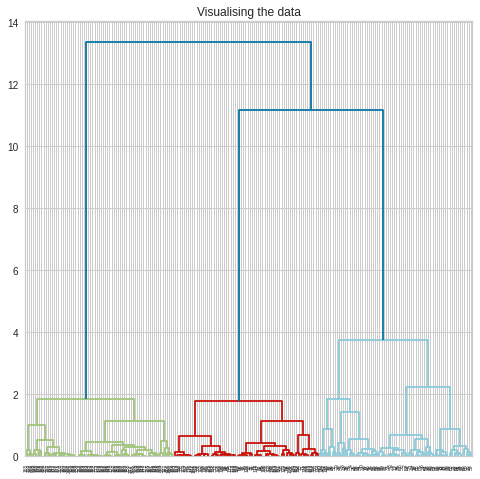

In [33]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

**Analysis of KMeans, KMediods and Agnes Clustering**

1) The Silhouette Average and Purity results of both K-Means And K-mediods are very close, mostly similar but if you perform different number of iterations on the data set you'll notice a slight difference between the values, which gives us our conclusion; K-Means is *slightly* better than K-Mediods


2) K-mediods results are sensitive to the initial mediods selected.

3) Agnes clustering doesn't work well on vast amount of data or, huge datasets unlike K-Means and K-Mediods

4) One major drawback of Agnes is that groups with close pairs can merge sooner than is optimal, even if those groups have overall dissimilarity. Complete Linkage: calculates similarity of the farthest away pair. One disadvantage to this method is that outliers can cause less-than-optimal merging.

5) In Agnes, you don't have to specify the number of clusters unlike K-Means and K-mediods